In [3]:

import networkx as nx
from tools import *
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
import glob
from tqdm import tqdm
plt.style.use('JHStyleBold.mplstyle')

In [4]:
path_img_folder = ["./Dados_image/FIBRO CITO T0 COL/","./Dados_image/FIBRO CITO T10 COL/","./Dados_image/FIBRO CITO T20 COL/","./Dados_image/FIBRO CITO T30 COL/"]
count_folder = 0

# Inicialize listas para armazenar matrizes
all_count_nodes_imgs = []
all_average_degree = []
all_global_average_clustering = []


for folder_path in path_img_folder:
    # Configurações de diretórios
    folder_original = glob.glob(path_img_folder[count_folder] + "*")
    count = 0

    count_nodes_imgs = np.zeros(len(folder_original))
    average_degree = np.zeros(len(folder_original))
    global_average_clustering = np.zeros(len(folder_original))

    for img_path  in tqdm(folder_original):

        img_th = th_otsu(gray(cv2.imread(img_path )))
        sk = skeletonize(img_th,  method= 'zhang').astype(int)*255

        dic,edges,nodes=nodEdg(sk)

        G=nx.from_pandas_edgelist(edges)
        #fig, ax = plt.subplots(figsize = (40, 30))
        pos = dic  # position layout

        #metricas
        count_nodes_imgs[count] = len(nodes)
        average_degree[count] = len(edges)/len(nodes)
        global_average_clustering[count] = nx.average_clustering(G)

        #count faz percorrer por cada imgem
        count+=1
    
        # Adicione matrizes às listas após calcular todas as métricas para uma pasta
    all_count_nodes_imgs.append(count_nodes_imgs)
    all_average_degree.append(average_degree)
    all_global_average_clustering.append(global_average_clustering)

    count_folder +=1


100%|██████████| 24/24 [00:26<00:00,  1.10s/it]


Quero calcular a quantidade de nodes da rede. Existe uma dispersão grande ? faz sentido procurar a dispersão ? no site tem outras metricas estatisticas q pode ajudar, ou nao

https://docs.python.org/pt-br/3/library/statistics.html#statistics.pstdev

3161.500536917167


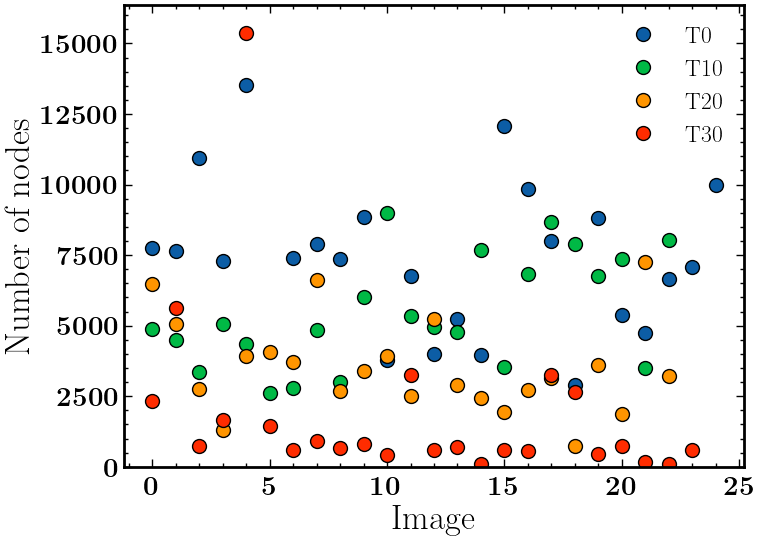

In [5]:
from statistics import stdev
def graphic_nodes(x, label):
   
    plt.plot(np.arange(len(x)), x, 'o', label = label)
    plt.legend()
    

graphic_nodes(all_count_nodes_imgs[0],label='T0')
graphic_nodes(all_count_nodes_imgs[1],label='T10')
graphic_nodes(all_count_nodes_imgs[2],label='T20')
graphic_nodes(all_count_nodes_imgs[3],label='T30')
plt.ylabel('Number of nodes')
plt.xlabel('Image')
plt.ylim([0,np.max(count_nodes_imgs)+1000])
print(stdev(count_nodes_imgs))

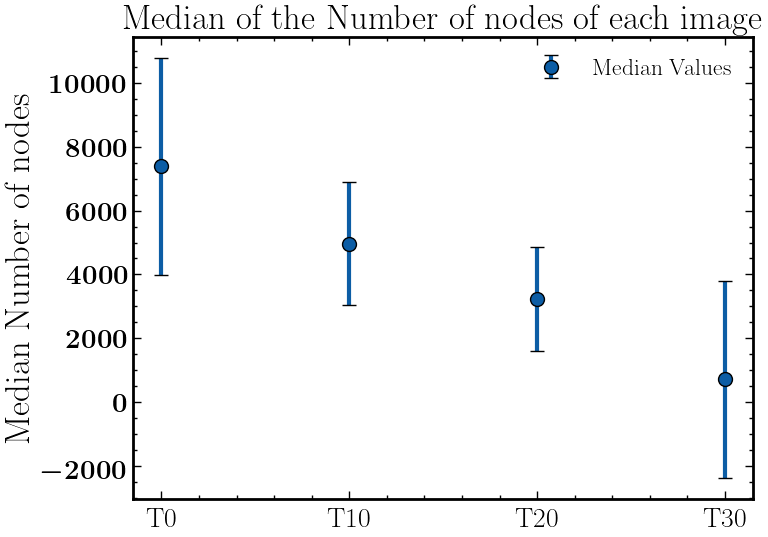

In [13]:
T0_median = np.median(all_count_nodes_imgs[0])
T10_median = np.median(all_count_nodes_imgs[1])
T20_median = np.median(all_count_nodes_imgs[2])
T30_median = np.median(all_count_nodes_imgs[3])
T_median = np.array([T0_median,T10_median,T20_median,T30_median,])


# Calculating standard deviations for error bars
T0_std = np.std(all_count_nodes_imgs[0])
T10_std = np.std(all_count_nodes_imgs[1])
T20_std = np.std(all_count_nodes_imgs[2])
T30_std = np.std(all_count_nodes_imgs[3])

T_std = np.array([T0_std, T10_std, T20_std, T30_std])


# Plotting with error bars
plt.errorbar(np.arange(len(T_median)), T_median, yerr=T_std, fmt='o', capsize=5)
plt.xticks(np.arange(len(T_median)), ['T0', 'T10', 'T20', 'T30'])
plt.ylabel('Median Number of nodes')
plt.title('Median of the Number of nodes of each image')

# Legend (Although in this case, it might be redundant given the x-axis labels)
plt.legend(['Median Values'])




aqui estou calculando average degree of a node usando o link. Nesse caso para cada imagem de celula temos um ponto no grafico.

https://bookdown.org/omarlizardo/_main/2-7-average-degree.html



(0.0, 2.614964216005205)

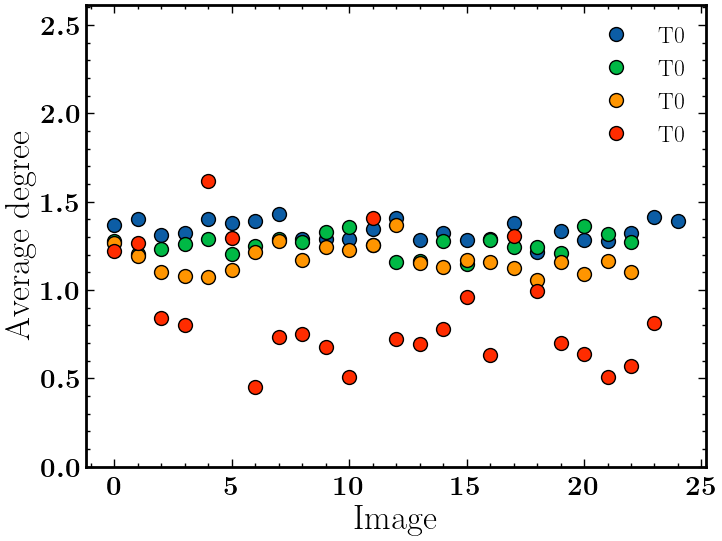

In [16]:
graphic_nodes(all_average_degree[0],label='T0')
graphic_nodes(all_average_degree[1],label='T0')
graphic_nodes(all_average_degree[2],label='T0')
graphic_nodes(all_average_degree[3],label='T0')
plt.ylabel('Average degree')
plt.xlabel('Image')
plt.ylim([0,np.max(average_degree)+1])

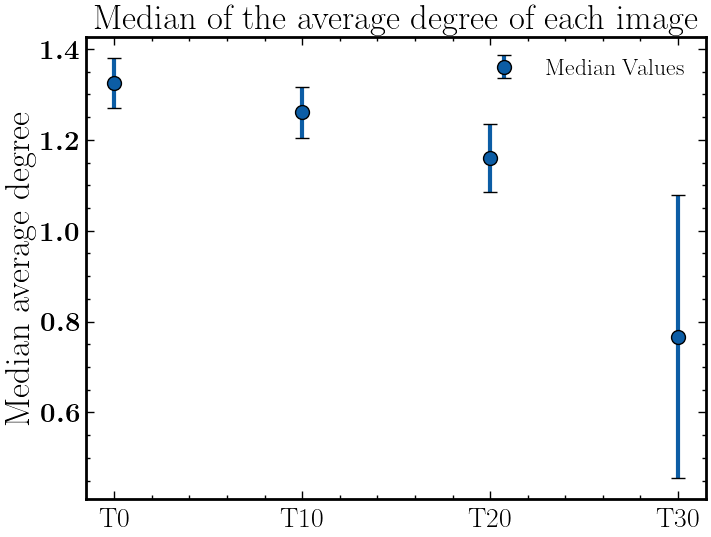

In [37]:
T0_median = np.median(all_average_degree[0])
T10_median = np.median(all_average_degree[1])
T20_median = np.median(all_average_degree[2])
T30_median = np.median(all_average_degree[3])
T_median = np.array([T0_median,T10_median,T20_median,T30_median,])


# Calculating standard deviations for error bars
T0_std = np.std(all_average_degree[0])
T10_std = np.std(all_average_degree[1])
T20_std = np.std(all_average_degree[2])
T30_std = np.std(all_average_degree[3])

T_std = np.array([T0_std, T10_std, T20_std, T30_std])


# Plotting with error bars
plt.errorbar(np.arange(len(T_median)), T_median, yerr=T_std, fmt='o', capsize=5)
plt.xticks(np.arange(len(T_median)), ['T0', 'T10', 'T20', 'T30'])
plt.ylabel('Median average degree')
plt.title('Median of the average degree of each image')

# Legend (Although in this case, it might be redundant given the x-axis labels)
plt.legend(['Median Values'])


clustering coefficient of a node Ci is defined as $Ci = \frac{(2Ei)}{(k(k + 1))}$, where k is the number of neighbors of the node i and Ei is the number of existing links between its neighbors.

Obs: It is worth noting that this metric places more weight on the low degree nodes, while the transitivity ratio places more weight on the high degree nodes. (so achei legal!)

No wiki tem dois casos: local e global. Calculei o global pq acho q faz mais sentido para comparar os valores.

https://en.wikipedia.org/wiki/Clustering_coefficient

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering

(-2.0, 1.26389264189683)

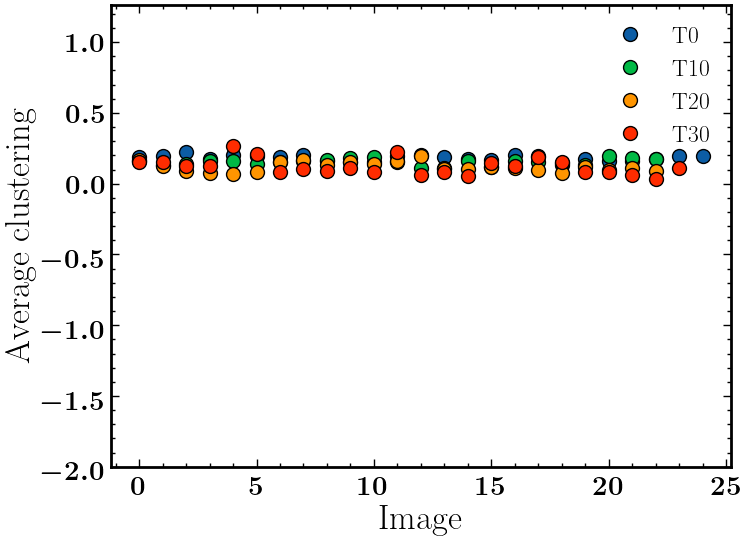

In [8]:
graphic_nodes(all_global_average_clustering[0],label='T0')
graphic_nodes(all_global_average_clustering[1],label='T10')
graphic_nodes(all_global_average_clustering[2],label='T20')
graphic_nodes(all_global_average_clustering[3],label='T30')

plt.ylabel('Average clustering')
plt.xlabel('Image')
plt.ylim([-2,np.max(global_average_clustering)+1])

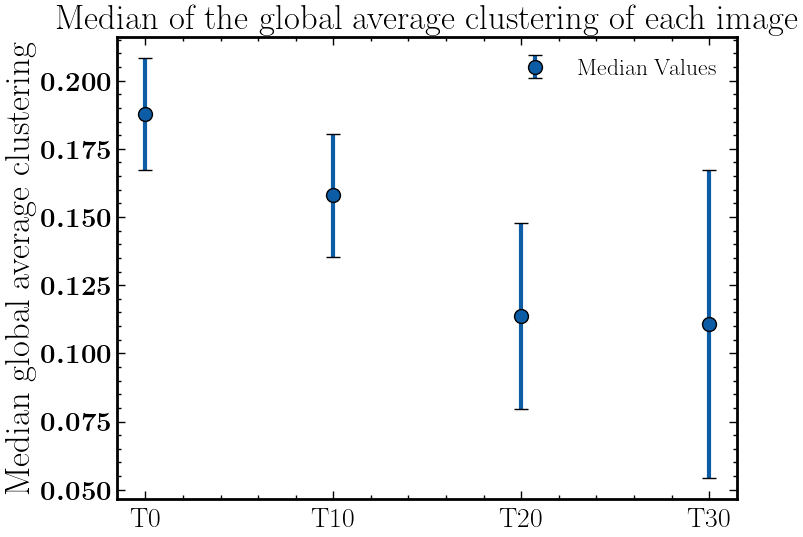

In [10]:
T0_median = np.median(all_global_average_clustering[0])
T10_median = np.median(all_global_average_clustering[1])
T20_median = np.median(all_global_average_clustering[2])
T30_median = np.median(all_global_average_clustering[3])
T_median = np.array([T0_median,T10_median,T20_median,T30_median,])


# Calculating standard deviations for error bars
T0_std = np.std(all_global_average_clustering[0])
T10_std = np.std(all_global_average_clustering[1])
T20_std = np.std(all_global_average_clustering[2])
T30_std = np.std(all_global_average_clustering[3])

T_std = np.array([T0_std, T10_std, T20_std, T30_std])


# Plotting with error bars
plt.errorbar(np.arange(len(T_median)), T_median, yerr=T_std, fmt='o', capsize=5)
plt.xticks(np.arange(len(T_median)), ['T0', 'T10', 'T20', 'T30'])
plt.ylabel('Median global average clustering')
plt.title('Median of the global average clustering of each image')

# Legend (Although in this case, it might be redundant given the x-axis labels)
plt.legend(['Median Values'])
